In [133]:
# CSI5155 - ASSIGNEMENT 1 
# FALL 2022
# ADRIEN HEYMANS
# Pr. Herna L. Viktor, Phd

In [134]:
# Importing the data

import numpy as np
import pandas as pd

data = "data/drug_consumption.csv"

df = pd.read_csv(data)
df.columns = ["id","age","gender","education","country","ethnicity","nscore","escore","oscore","ascore","cscore","impulsive","ss","alcohol","amphet","amyl","benzos","caff","canabis","choc","coke","crack","ecstasy","heroin","ketamine","legalh","lsd","meth","mushrooms","nicotine","semer","vsa"]

# We want to convert this problem to a binary classification C1,C2 = "non-user" and C3,C4,C5,C6 = "user"
df = df.replace(['CL0','CL1'],0)
df = df.replace(['CL2','CL3','CL4','CL5','CL6'],1)

#saving the processed data in a separate file for visualization
df.to_csv("data/processed_data.csv",index=False)

In [135]:
# Now that we have trasnformed this into a binary classification problem, we can start looking into the feature engineering of the dataset.
# We can see that we have two type of features : demographic and personnality. But before deciding which one we want to keep, we should first get a feel of the data. 

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


# X_train, X_test, y_train, y_test = train_test_split(
#     df.drop(["amphet","amyl","benzos","caff","canabis","choc","coke","crack","ecstasy","heroin","ketamine","legalh","lsd","meth","mushrooms","nicotine","semer","vsa"], axis=1),
#     df['alcohol'],
#     test_size=0.3,
#     random_state=0
#     )

# clf = RandomForestClassifier(max_depth=2, random_state=0)
# clf.fit(X_train,y_train)

# res = clf.predict(X_test)

# np.mean(res==y_test)

demographicData = df.drop(["id","nscore","escore","oscore","ascore","cscore","impulsive","ss"], axis=1)
demographicData.to_csv("data/demographic.csv",index=False)
personnalityData = df.drop(["id","age","gender","education","country","ethnicity"], axis=1)
personnalityData.to_csv("data/personnality.csv",index=False)
allData = df.drop(["id"],axis=1)
allData.to_csv("data/allData.csv",index=False)


Tree Classifier
Demographic Data for alcohol
   0    1
0  1   12
1  6  547
Personnality Data for alcohol
    0    1
0   1   12
1  24  529
All Data for alcohol
    0    1
0   1   12
1  34  519
Demographic Data for amphet
     0   1
0  296  76
1   96  98
Personnality Data for amphet
     0    1
0  241  131
1   90  104
All Data for amphet
     0    1
0  260  112
1   87  107
Demographic Data for amyl
     0   1
0  417  33
1   95  21
Personnality Data for amyl
     0   1
0  359  91
1   88  28
All Data for amyl
     0   1
0  382  68
1   73  43
Demographic Data for benzos
     0    1
0  274   63
1  114  115
Personnality Data for benzos
     0    1
0  212  125
1  104  125
All Data for benzos
     0    1
0  215  122
1  107  122
Demographic Data for caff
   0    1
0  0   11
1  5  550
Personnality Data for caff
    0    1
0   0   11
1  12  543
All Data for caff
    0    1
0   0   11
1  10  545
Demographic Data for canabis
     0    1
0  113   68
1   71  314
Personnality Data for canabis
     0   

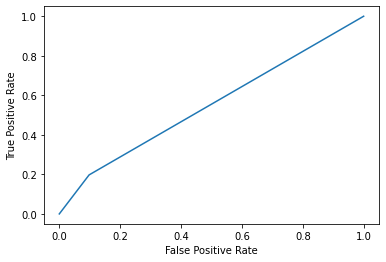

In [147]:
# DECISION TREE
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt

# We have 19 diffrent drigs to classify, this means that we will need to do 19 different classification
drugs = ["alcohol","amphet","amyl","benzos","caff","canabis","choc","coke","crack","ecstasy","heroin","ketamine","legalh","lsd","meth","mushrooms","nicotine","semer","vsa"]

#creating an array to store the results
results = pd.DataFrame(columns=["Drug","Demographic","Personnality","All"])
overall_accuracy = 0

# **DEMOGRAPHIC DATA**
# We want to see it if only the demographic data would be enough to classify the different drugs
print('\033[1m'+"Tree Classifier"+'\033[0m')
for cl in drugs:

    row = []
   
    #DEMOGRAPHIC
    X_train, X_test, y_train, y_test = train_test_split( demographicData.drop(drugs, axis=1),demographicData[cl], test_size=0.3,random_state=0)
    clf1 = tree.DecisionTreeClassifier()
    clf1.fit(X_train,y_train)
    y_pred = clf1.predict(X_test)
    #print("Prediction for "+cl)
    #plot_confusion_matrix(clf, X_test, y_test) 
    cf_matrix = confusion_matrix(y_test, y_pred)
    matrix = pd.DataFrame(cf_matrix)
    print("Demographic Data for "+cl)
    print(matrix)
    acc1 = balanced_accuracy_score(y_test, y_pred)
    #saving matric to CSV
    matrix.to_csv("results/tree_classifier/confusion_matrix/"+cl+"_demographic.csv")
    #create the ROC
    y_pred_proba = clf1.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

    #create ROC curve
    plt.clf()
    plt.plot(fpr,tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.savefig("results/tree_classifier/ROC/"+cl+"_demographic.png")

    #PERSONNALITY
    X_train, X_test, y_train, y_test = train_test_split( personnalityData.drop(drugs, axis=1),personnalityData[cl], test_size=0.3,random_state=0)
    clf2 = tree.DecisionTreeClassifier()
    clf2.fit(X_train,y_train)
    y_pred = clf2.predict(X_test)
    acc2 = balanced_accuracy_score(y_test, y_pred)
    cf_matrix = confusion_matrix(y_test, y_pred)
    matrix = pd.DataFrame(cf_matrix)
    print("Personnality Data for "+cl)
    print(matrix)
    matrix.to_csv("results/tree_classifier/confusion_matrix/"+cl+"_personnality.csv")
    #create the ROC
    y_pred_proba = clf2.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

    #create ROC curve
    plt.clf()
    plt.plot(fpr,tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.savefig("results/tree_classifier/ROC/"+cl+"_personnality.png")


    ##ALLDATA
    X_train, X_test, y_train, y_test = train_test_split( allData.drop(drugs, axis=1),allData[cl], test_size=0.3,random_state=0)
    clf3 = tree.DecisionTreeClassifier()
    clf3.fit(X_train,y_train)
    y_pred = clf3.predict(X_test)
    acc3 = balanced_accuracy_score(y_test, y_pred)
    cf_matrix = confusion_matrix(y_test, y_pred)
    matrix = pd.DataFrame(cf_matrix)
    print("All Data for "+cl)
    print(matrix)
    matrix.to_csv("results/tree_classifier/confusion_matrix/"+cl+"_allData.csv")
    #create the ROC
    y_pred_proba = clf3.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

    #create ROC curve
    plt.clf()
    plt.plot(fpr,tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.savefig("results/tree_classifier/ROC/"+cl+"_allData.png")



    #Adding the accuracy results to the result array
    #row = pd.DataFrame([cl,acc1,acc2,acc3],columns=["Drug","Demographic","Personnality","All"])
    new_row = {"Drug":cl,"Demographic":acc1,"Personnality":acc2,"All":acc3}
    results = results.append(new_row,ignore_index=True)
    overall_accuracy = overall_accuracy+ acc1+acc2+acc3
    
results.to_csv("results/tree_classifier/tree_classifier_results.csv")
print(results)
print("Overall Accuracy : "+str(overall_accuracy/57))

Random Forest Classifier
         Drug  Demographic  Personnality       All
0     alcohol     0.536653      0.500000  0.500000
1      amphet     0.658949      0.616478  0.658949
2        amyl     0.560383      0.511552  0.566475
3      benzos     0.679286      0.643761  0.668816
4        caff     0.500000      0.500000  0.500000
5     canabis     0.715864      0.725780  0.784100
6        choc     0.499102      0.500000  0.500000
7        coke     0.600769      0.614280  0.662487
8       crack     0.552233      0.496063  0.522909
9     ecstasy     0.717235      0.649304  0.712849
10     heroin     0.508360      0.512921  0.542772
11   ketamine     0.519823      0.517449  0.526701
12     legalh     0.750493      0.670417  0.781960
13        lsd     0.743733      0.629514  0.724249
14       meth     0.698286      0.535083  0.644481
15  mushrooms     0.749811      0.628479  0.741529
16   nicotine     0.630619      0.612384  0.668119
17      semer     0.500000      0.500000  0.500000
18    

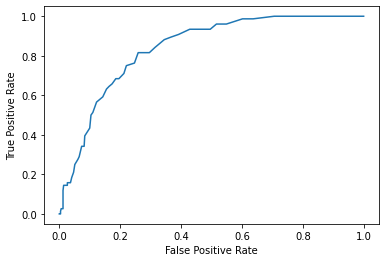

In [139]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score

# We have 19 diffrent drigs to classify, this means that we will need to do 19 different classification
drugs = ["alcohol","amphet","amyl","benzos","caff","canabis","choc","coke","crack","ecstasy","heroin","ketamine","legalh","lsd","meth","mushrooms","nicotine","semer","vsa"]

#creating an array to store the results
results = pd.DataFrame(columns=["Drug","Demographic","Personnality","All"])
overall_accuracy = 0

# **DEMOGRAPHIC DATA**
# We want to see it if only the demographic data would be enough to classify the different drugs
print('\033[1m'+"Random Forest Classifier"+'\033[0m')
for cl in drugs:

    row = []
   
    #DEMOGRAPHIC
    X_train, X_test, y_train, y_test = train_test_split( demographicData.drop(drugs, axis=1),demographicData[cl], test_size=0.3,random_state=0)
    clf1 = RandomForestClassifier()
    clf1.fit(X_train,y_train)
    y_pred = clf1.predict(X_test)
    #print("Prediction for "+cl)
    #plot_confusion_matrix(clf, X_test, y_test)  
    #cf_matrix = confusion_matrix(y_test, y_pred)
    #print(cf_matrix)
    # print("Balanced Accuracy : ",str(balanced_accuracy_score(y_test, y_pred)))
    acc1 = balanced_accuracy_score(y_test, y_pred)
    #saving matric to CSV
    cf_matrix = confusion_matrix(y_test, y_pred)
    matrix = pd.DataFrame(cf_matrix)
    matrix.to_csv("results/random_forest_classifier/confusion_matrix/"+cl+"_demographic.csv")
    #create the ROC
    y_pred_proba = clf1.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

    #create ROC curve
    plt.clf()
    plt.plot(fpr,tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.savefig("results/random_forest_classifier/ROC/"+cl+"_demographic.png")

    #PERSONNALITY
    X_train, X_test, y_train, y_test = train_test_split( personnalityData.drop(drugs, axis=1),personnalityData[cl], test_size=0.3,random_state=0)
    clf2 = RandomForestClassifier()
    clf2.fit(X_train,y_train)
    y_pred = clf2.predict(X_test)
    acc2 = balanced_accuracy_score(y_test, y_pred)
    #saving matric to CSV
    cf_matrix = confusion_matrix(y_test, y_pred)
    matrix = pd.DataFrame(cf_matrix)
    matrix.to_csv("results/random_forest_classifier/confusion_matrix/"+cl+"_personnality.csv")
    #create the ROC
    y_pred_proba = clf2.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

    #create ROC curve
    plt.clf()
    plt.plot(fpr,tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.savefig("results/random_forest_classifier/ROC/"+cl+"_personnality.png")

    ##ALLDATA
    X_train, X_test, y_train, y_test = train_test_split( allData.drop(drugs, axis=1),allData[cl], test_size=0.3,random_state=0)
    clf3 = RandomForestClassifier()
    clf3.fit(X_train,y_train)
    y_pred = clf3.predict(X_test)
    acc3 = balanced_accuracy_score(y_test, y_pred)
    #saving matric to CSV
    cf_matrix = confusion_matrix(y_test, y_pred)
    matrix = pd.DataFrame(cf_matrix)
    matrix.to_csv("results/random_forest_classifier/confusion_matrix/"+cl+"_allData.csv")
    #create the ROC
    y_pred_proba = clf3.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

    #create ROC curve
    plt.clf()
    plt.plot(fpr,tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.savefig("results/random_forest_classifier/ROC/"+cl+"_allData.png")
    
    #Adding the accuracy results to the result array
    #row = pd.DataFrame([cl,acc1,acc2,acc3],columns=["Drug","Demographic","Personnality","All"])
    new_row = {"Drug":cl,"Demographic":acc1,"Personnality":acc2,"All":acc3}
    results = results.append(new_row,ignore_index=True)
    overall_accuracy = overall_accuracy+ acc1+acc2+acc3

results.to_csv("results/random_forest_classifier/random_forest_classifier_results.csv")
print(results)
print("Overall Accuracy : "+str(overall_accuracy/57))

Suppoprt Vector Classifier
         Drug  Demographic  Personnality       All
0     alcohol     0.500000      0.500000  0.500000
1      amphet     0.680897      0.620621  0.675424
2        amyl     0.500000      0.500000  0.507510
3      benzos     0.685136      0.651432  0.693785
4        caff     0.500000      0.500000  0.500000
5     canabis     0.755055      0.684014  0.780204
6        choc     0.500000      0.500000  0.500000
7        coke     0.572748      0.620914  0.658333
8       crack     0.500000      0.500000  0.500000
9     ecstasy     0.714536      0.658180  0.734883
10     heroin     0.500000      0.500000  0.500000
11   ketamine     0.500000      0.500000  0.502800
12     legalh     0.772631      0.694747  0.796598
13        lsd     0.770895      0.588173  0.740072
14       meth     0.647276      0.526064  0.623503
15  mushrooms     0.763361      0.648955  0.750155
16   nicotine     0.610888      0.622427  0.663769
17      semer     0.500000      0.500000  0.500000
18  

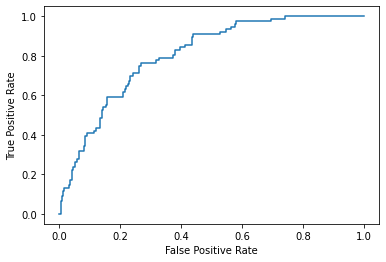

In [144]:
# SUPPORT VECTOR
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score

# We have 19 diffrent drigs to classify, this means that we will need to do 19 different classification
drugs = ["alcohol","amphet","amyl","benzos","caff","canabis","choc","coke","crack","ecstasy","heroin","ketamine","legalh","lsd","meth","mushrooms","nicotine","semer","vsa"]

#creating an array to store the results
results = pd.DataFrame(columns=["Drug","Demographic","Personnality","All"])
overall_accuracy = 0

# **DEMOGRAPHIC DATA**
# We want to see it if only the demographic data would be enough to classify the different drugs
print('\033[1m'+"Suppoprt Vector Classifier"+'\033[0m')
for cl in drugs:

    row = []
   
    #DEMOGRAPHIC
    X_train, X_test, y_train, y_test = train_test_split( demographicData.drop(drugs, axis=1),demographicData[cl], test_size=0.3,random_state=0)
    clf1 = svm.SVC(probability=True)
    clf1.fit(X_train,y_train)
    y_pred = clf1.predict(X_test)
    #print("Prediction for "+cl)
    #plot_confusion_matrix(clf, X_test, y_test)  
    #cf_matrix = confusion_matrix(y_test, y_pred)
    #print(cf_matrix)
    # print("Balanced Accuracy : ",str(balanced_accuracy_score(y_test, y_pred)))
    acc1 = balanced_accuracy_score(y_test, y_pred)
    #saving matric to CSV
    cf_matrix = confusion_matrix(y_test, y_pred)
    matrix = pd.DataFrame(cf_matrix)
    matrix.to_csv("results/svm_classifier/confusion_matrix/"+cl+"_demographic.csv")
    #create the ROC
    y_pred_proba = clf1.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

    #create ROC curve
    plt.clf()
    plt.plot(fpr,tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.savefig("results/svm_classifier/ROC/"+cl+"_demographic.png")

    #PERSONNALITY
    X_train, X_test, y_train, y_test = train_test_split( personnalityData.drop(drugs, axis=1),personnalityData[cl], test_size=0.3,random_state=0)
    clf2 = svm.SVC(probability=True)
    clf2.fit(X_train,y_train)
    y_pred = clf2.predict(X_test)
    acc2 = balanced_accuracy_score(y_test, y_pred)
    #saving matric to CSV
    cf_matrix = confusion_matrix(y_test, y_pred)
    matrix = pd.DataFrame(cf_matrix)
    matrix.to_csv("results/svm_classifier/confusion_matrix/"+cl+"_personnality.csv")
    #create the ROC
    y_pred_proba =  clf2.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

    #create ROC curve
    plt.clf()
    plt.plot(fpr,tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.savefig("results/svm_classifier/ROC/"+cl+"_personnality.png")

    ##ALLDATA
    X_train, X_test, y_train, y_test = train_test_split( allData.drop(drugs, axis=1),allData[cl], test_size=0.3,random_state=0)
    clf3 = svm.SVC(probability=True)
    clf3.fit(X_train,y_train)
    y_pred = clf3.predict(X_test)
    acc3 = balanced_accuracy_score(y_test, y_pred)
    #saving matric to CSV
    cf_matrix = confusion_matrix(y_test, y_pred)
    matrix = pd.DataFrame(cf_matrix)
    matrix.to_csv("results/svm_classifier/confusion_matrix/"+cl+"_allData.csv")
    #create the ROC
    y_pred_proba =  clf3.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

    #create ROC curve
    plt.clf()
    plt.plot(fpr,tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.savefig("results/svm_classifier/ROC/"+cl+"_allData.png")
    
    #Adding the accuracy results to the result array
    #row = pd.DataFrame([cl,acc1,acc2,acc3],columns=["Drug","Demographic","Personnality","All"])
    new_row = {"Drug":cl,"Demographic":acc1,"Personnality":acc2,"All":acc3}
    results = results.append(new_row,ignore_index=True)
    overall_accuracy = overall_accuracy+ acc1+acc2+acc3

results.to_csv("results/svm_classifier/svm_classifier_results.csv")
print(results)
print("Overall Accuracy : "+str(overall_accuracy/57))

K-nearest Neighbours Classifier
         Drug  Demographic  Personnality       All
0     alcohol     0.537557      0.493671  0.498192
1      amphet     0.542096      0.614802  0.643817
2        amyl     0.585345      0.555670  0.594195
3      benzos     0.575292      0.617392  0.640347
4        caff     0.500000      0.500000  0.498198
5     canabis     0.691332      0.687458  0.751797
6        choc     0.500000      0.500000  0.500000
7        coke     0.526780      0.624312  0.649987
8       crack     0.566522      0.507161  0.529324
9     ecstasy     0.680357      0.645269  0.676178
10     heroin     0.542667      0.532199  0.558595
11   ketamine     0.539849      0.568924  0.546322
12     legalh     0.706062      0.619771  0.744316
13        lsd     0.620222      0.599590  0.701787
14       meth     0.605862      0.562789  0.624026
15  mushrooms     0.738283      0.628974  0.690060
16   nicotine     0.586706      0.567680  0.609530
17      semer     0.500000      0.500000  0.500000

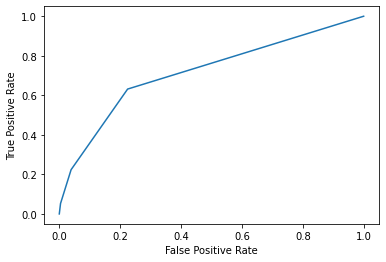

In [145]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score

# We have 19 diffrent drigs to classify, this means that we will need to do 19 different classification
drugs = ["alcohol","amphet","amyl","benzos","caff","canabis","choc","coke","crack","ecstasy","heroin","ketamine","legalh","lsd","meth","mushrooms","nicotine","semer","vsa"]

#creating an array to store the results
results = pd.DataFrame(columns=["Drug","Demographic","Personnality","All"])
overall_accuracy = 0

# **DEMOGRAPHIC DATA**
# We want to see it if only the demographic data would be enough to classify the different drugs
print('\033[1m'+"K-nearest Neighbours Classifier"+'\033[0m')
for cl in drugs:

    row = []
   
    #DEMOGRAPHIC
    X_train, X_test, y_train, y_test = train_test_split( demographicData.drop(drugs, axis=1),demographicData[cl], test_size=0.3,random_state=0)
    clf1 = KNeighborsClassifier(n_neighbors=3)
    clf1.fit(X_train,y_train)
    y_pred = clf1.predict(X_test)
    acc1 = balanced_accuracy_score(y_test, y_pred)
    #saving matric to CSV
    cf_matrix = confusion_matrix(y_test, y_pred)
    matrix = pd.DataFrame(cf_matrix)
    matrix.to_csv("results/knn_classifier/confusion_matrix/"+cl+"_demographic.csv")
    #create the ROC
    y_pred_proba =  clf1.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

    #create ROC curve
    plt.clf()
    plt.plot(fpr,tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.savefig("results/knn_classifier/ROC/"+cl+"_demographic.png")

    #PERSONNALITY
    X_train, X_test, y_train, y_test = train_test_split( personnalityData.drop(drugs, axis=1),personnalityData[cl], test_size=0.3,random_state=0)
    clf2 = KNeighborsClassifier(n_neighbors=3)
    clf2.fit(X_train,y_train)
    y_pred = clf2.predict(X_test)
    acc2 = balanced_accuracy_score(y_test, y_pred)
    #saving matric to CSV
    cf_matrix = confusion_matrix(y_test, y_pred)
    matrix = pd.DataFrame(cf_matrix)
    matrix.to_csv("results/knn_classifier/confusion_matrix/"+cl+"_personnality.csv")
    #create the ROC
    y_pred_proba =  clf2.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

    #create ROC curve
    plt.clf()
    plt.plot(fpr,tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.savefig("results/knn_classifier/ROC/"+cl+"_personnality.png")


    ##ALLDATA
    X_train, X_test, y_train, y_test = train_test_split( allData.drop(drugs, axis=1),allData[cl], test_size=0.3,random_state=0)
    clf3 = KNeighborsClassifier(n_neighbors=3)
    clf3.fit(X_train,y_train)
    y_pred = clf3.predict(X_test)
    acc3 = balanced_accuracy_score(y_test, y_pred)
    #saving matric to CSV
    cf_matrix = confusion_matrix(y_test, y_pred)
    matrix = pd.DataFrame(cf_matrix)
    matrix.to_csv("results/knn_classifier/confusion_matrix/"+cl+"_allData.csv")
    #create the ROC
    y_pred_proba =  clf3.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

    #create ROC curve
    plt.clf()
    plt.plot(fpr,tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.savefig("results/knn_classifier/ROC/"+cl+"_allData.png")
    
    #Adding the accuracy results to the result array
    #row = pd.DataFrame([cl,acc1,acc2,acc3],columns=["Drug","Demographic","Personnality","All"])
    new_row = {"Drug":cl,"Demographic":acc1,"Personnality":acc2,"All":acc3}
    results = results.append(new_row,ignore_index=True)
    overall_accuracy = overall_accuracy+ acc1+acc2+acc3

results.to_csv("results/knn_classifier/knn_classifier_results.csv")
print(results)
print("Overall Accuracy : "+str(overall_accuracy/57))

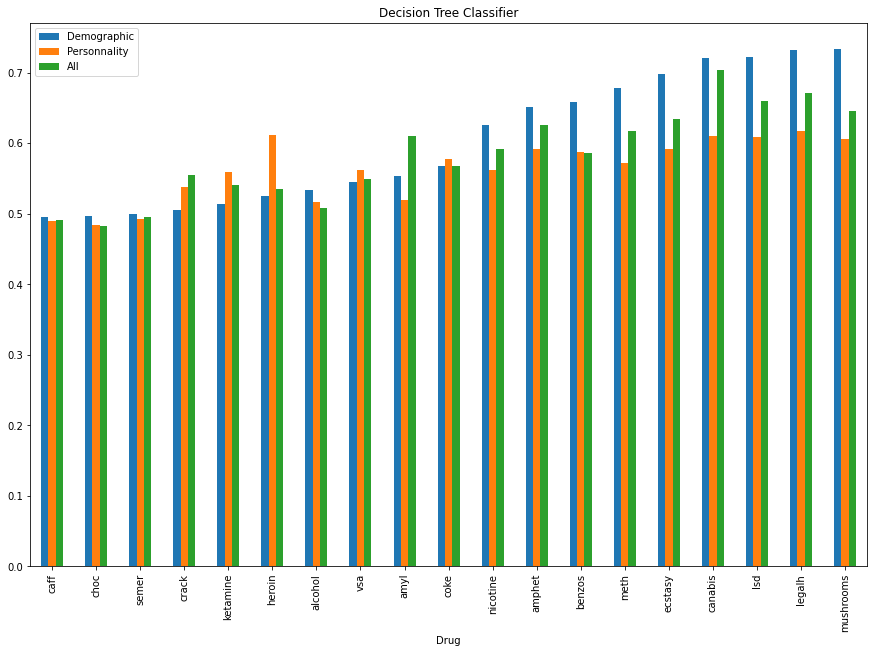

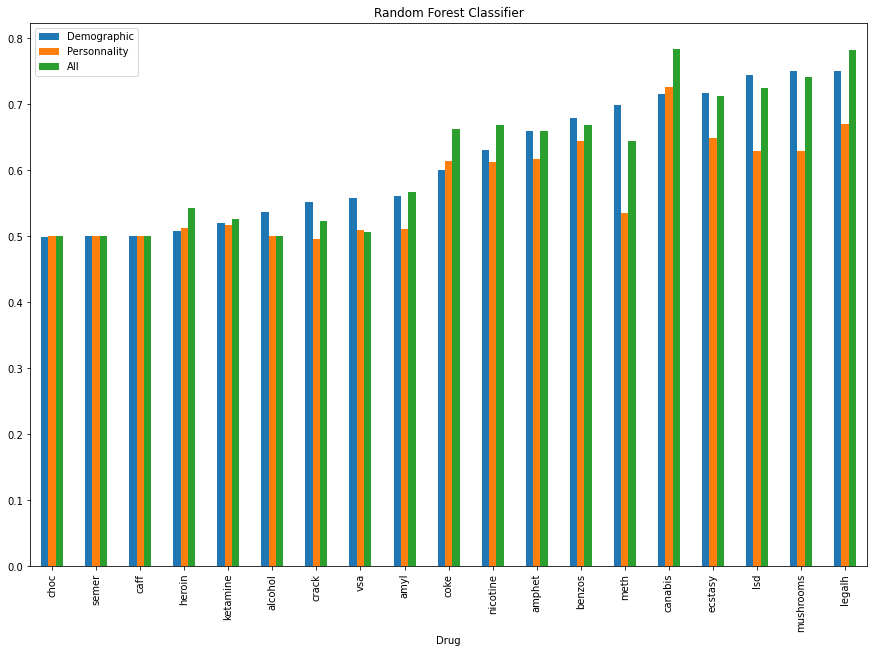

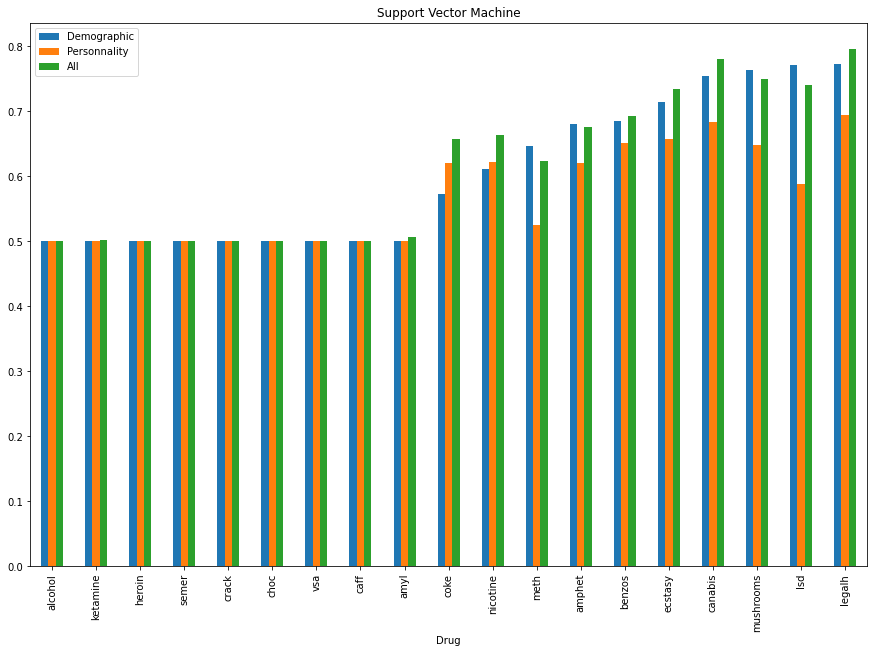

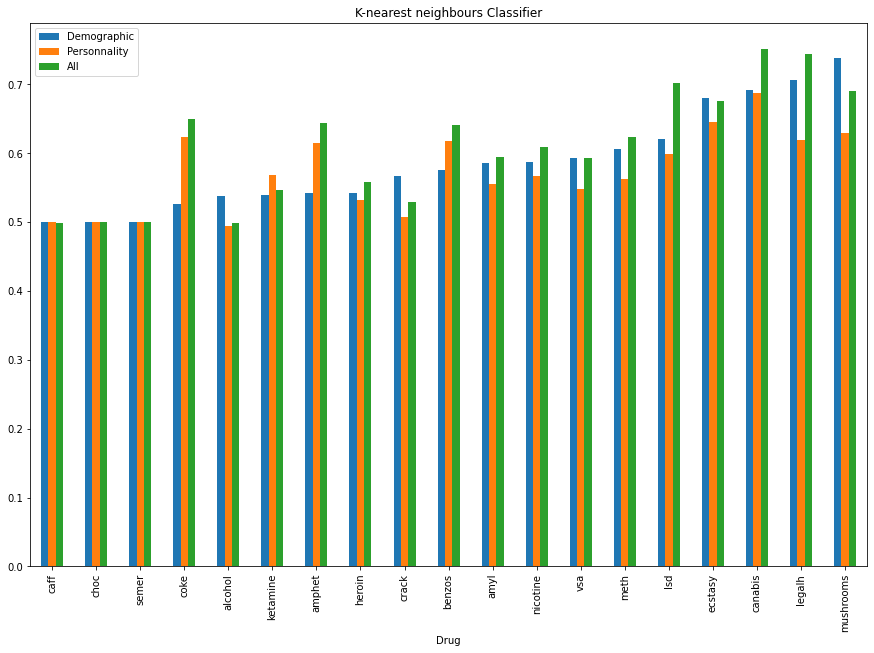

In [149]:
# We want to plot the results to visualise them 

#Decision tree 
tree_results = pd.read_csv("results/tree_classifier/tree_classifier_results.csv")
tree_results = tree_results[tree_results["All"] > 0].sort_values("Demographic")
fig1 =tree_results.plot(x="Drug",y=["Demographic","Personnality","All"],kind="bar",title="Decision Tree Classifier",figsize=(15,10))
pic = fig1.get_figure()

pic.savefig("results/tree_classifier/tree_results.png")
#Random Forest
random_forest_results = pd.read_csv("results/random_forest_classifier/random_forest_classifier_results.csv")
random_forest_results = random_forest_results[random_forest_results["All"] > 0].sort_values("Demographic")
fig2 = random_forest_results.plot(x="Drug",y=["Demographic","Personnality","All"],kind="bar",title="Random Forest Classifier",figsize=(15,10))
pic = fig2.get_figure()
pic.savefig("results/random_forest_classifier/random_forest_results.png")

#SVM
svm_results = pd.read_csv("results/svm_classifier/svm_classifier_results.csv")
svm_results = svm_results[svm_results["All"] > 0].sort_values("Demographic")
fig3 = svm_results.plot(x="Drug",y=["Demographic","Personnality","All"],kind="bar",title="Support Vector Machine",figsize=(15,10))
pic = fig3.get_figure()
pic.savefig("results/svm_classifier/svm_results.png")
#KNN
knn_results = pd.read_csv("results/knn_classifier/knn_classifier_results.csv")
knn_results = knn_results[knn_results["All"] > 0].sort_values("Demographic")
fig4 = knn_results.plot(x="Drug",y=["Demographic","Personnality","All"],kind="bar",title="K-nearest neighbours Classifier",figsize=(15,10))
pic = fig4.get_figure()
pic.savefig("results/knn_classifier/knn_results.png")